# INSTRUÇÕES

1. Preencha as informações de identificação na célula abaixo antes de fazer a entrega
2. Entregue apenas este **notebook com as partes requeridas preenchidas e com os resultados da execução** de todas as células com código
3. Não altere o nome e parâmetros das funções.
4. Dúvidas devem ser postadas no fórum do e-disciplinas (enquanto não encontramos outra alternativa)
5. A data de entrega é pra valer
6. Se estas intruções precisarem ser alteradas, será enviado um aviso via Quadro de Avisos do e-disciplinas

### IDENTIFICAÇÃO

* Escreve o seu nome
  - **Nome:** Gabriel Haruo Hanai Takeuchi
  
  
* Aluno regular de pós, aluno especial na pós, aluno regular de graduação, aluno especial na graduação, ouvinte, outro (especificar) -- indique a sua categoria
  - **Categoria:**  Aluno regular de graduação
  
  
* "Ao submeter este EP, declaro que o que está sendo entregue é fruto de meu próprio trabalho, e que não recorri a formas anti-éticas para fazer o EP." Responda SIM ou NÃO
  - **Declaração:** SIM
  
  
* Caso tenha se baseado em **material externo** para fazer o EP e o material consultado tenha sido preponderante para fazer o EP, inclua as referências consultadas. Descreva (brevemente) abaixo para quê ou de que forma cada um deles foi útil. Se você usou ChatGPT ou similares, escreva sobre isso também.



# MAC0460 / MAC5832 (2025)
<hr>

# EP1: Linear regression - analytic solution

### Objectives:

- to implement and test the analytic solution for the linear regression task (see, for instance, <a href="http://work.caltech.edu/slides/slides03.pdf">Slides of Lecture 03</a> of *Learning from Data*)
- to understand the core idea (*optimization of a loss/cost function*) for parameter adjustment in machine learning

### What to do:
- some cells of this notebook must be filled. Places to be filled are indicated as:
<code>
    # START OF YOUR CODE
    
    \# END OF YOUR CODE
</code> 
<hr>

### Some imports

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline


## Exploring the dataset 

Here we will use the *Boston Housing Dataset*. See a description of the dataset at https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html. The dataset was downloaded from Kaggle and it is made available with this notebook (file HousingData.csv)

Below is the list of the dataset variables (features). We will use MEDV as the prediction target (output). The remaining variables can be used as input features.
<pre>
        CRIM - per capita crime rate by town
        ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
        INDUS - proportion of non-retail business acres per town.
        CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
        NOX - nitric oxides concentration (parts per 10 million)
        RM - average number of rooms per dwelling
        AGE - proportion of owner-occupied units built prior to 1940
        DIS - weighted distances to five Boston employment centres
        RAD - index of accessibility to radial highways
        TAX - full-value property-tax rate per $10,000
        PTRATIO - pupil-teacher ratio by town
        B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        LSTAT - % lower status of the population
        MEDV - Median value of owner-occupied homes in $1000
</pre>


In [7]:
# Load the dataset. See https://pandas.pydata.org/ to learn about pandas
df=pd.read_csv('HousingData.csv')

# show first instances of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [8]:
# show basic info regarding variables and dataset size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
# show some basic statistics of the dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
# Counting NaN values per column
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [11]:
# The missing data (NaN) will be filled with the average value of the respective column. Since our aim in this EP
# is to learn the linear regression algorithm, we will not discuss whether this decision is adequate or not.
 
df = df.fillna(df.mean())
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Preparing data for the linear regression task

X shape:  (506, 2)
y shape:  (506, 1)


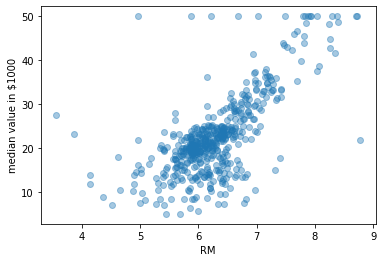

In [12]:
# All features: CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT

# choose one input feature
colname = 'RM'
X = df.loc[:, colname]
X = X.to_numpy().reshape(-1,1) # transform into a column vector
X = np.concatenate([np.ones((len(X), 1)), X], axis = 1)  # data matrix, with left column of ONEs

# target feature
y = df.loc[:, 'MEDV']
y = y.to_numpy()
y = y.reshape((-1,1)) # transform into a column vector

print("X shape: ", X.shape)
print("y shape: ", y.shape)

# Plot the chosen (X,y) dataset
plt.scatter(X[:,1], y, alpha=0.4)
plt.xlabel(colname)
plt.ylabel('median value in $1000')

plt.show()

# Linear regression recap

Given a dataset $\{(\mathbf{x}^{(1)}, y^{(1)}), \dots ,(\mathbf{x}^{(N)}, y^{(N)})\}$ with $\mathbf{x}^{(i)} \in \mathbb{R}^{d}$ and $y^{(i)} \in \mathbb{R}$, we consider the family of linear models consisting of functions of the form
$$
h(\mathbf{x}^{(i)}; \mathbf{w}) = w_0 + \sum_{j=1}^{d} w_jx_j
$$
where $\mathbf{w} = (w_0, w_1, \ldots, w_d)$.

Note that $h(\mathbf{x}^{(i)}; \mathbf{w})$ is, in fact, an  [affine transformation](https://en.wikipedia.org/wiki/Affine_transformation) of  $\mathbf{x}^{(i)}$. As commonly done, we will use the term "linear" to refer to an affine transformation.

The output of $h$ is a linear transformation of $\mathbf{x}^{(i)}$. We use the notation $h(\mathbf{x}^{(i)}; \mathbf{w})$ to make clear that $h$ is a parametric model, i.e., the transformation $h$ is defined  by the parameters $\mathbf{w}$. We can view vector $\mathbf{w}$ as a *weight* vector that controls the effect of each *feature* in the prediction.

By adding one component with value equal to 1 to the instances $\mathbf{x}$ (an artificial coordinate), we have:

$$\tilde{\mathbf{x}} = (1, x_1, \ldots, x_d) \in \mathbb{R}^{1+d}$$

and then we can simplify the notation:
$$
\hat{y}^{(i)} = h(\mathbf{x}^{(i)}; \mathbf{w}) = \mathbf{w}^\top  \tilde{\mathbf{x}}^{(i)}
$$

We would like to determine the optimal parameters $\mathbf{w}$ such that prediction $\hat{y}^{(i)}$ is as closest as possible to $y^{(i)}$ according to some error metric. Adopting the *mean square error* (MSE) as such metric we have the following cost function:

\begin{equation}
\mathcal{L}(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^{N}\big(\hat{y}^{(i)} - y^{(i)}\big)^{2}
\end{equation}

Thus, our task is to determine a function $h$ that minimizes $\mathcal{L}(\mathbf{w})$.

To know more about MSE ( also referred to as *mean <span style="color: red">squared</span> error* ) see for instance its [explanation on Wikipedia](https://en.wikipedia.org/wiki/Mean_squared_error).



### The solution

( See Section 3.2 of the textbook (or [Lecture 3](http://www.youtube.com/watch?v=FIbVs5GbBlQ)), or Section 2 of  [this text](https://sgfin.github.io/files/notes/CS229_Lecture_Notes.pdf), for more details )

Given $f:\mathbb{R}^{N\times d} \rightarrow \mathbb{R}$ and $\mathbf{A} \in \mathbb{R}^{N\times d}$, we define the gradient of $f$ with respect to $\mathbf{A}$ as:

\begin{equation*}
\nabla_{\mathbf{A}}f = \frac{\partial f}{\partial \mathbf{A}} =  \begin{bmatrix}
\frac{\partial f}{\partial \mathbf{A}_{1,1}} & \dots & \frac{\partial f}{\partial \mathbf{A}_{1,d}} \\
\vdots &  \ddots & \vdots \\
\frac{\partial f}{\partial \mathbf{A}_{n,1}} &  \dots & \frac{\partial f}{\partial \mathbf{A}_{n,d}}
\end{bmatrix}
\end{equation*}

Let $\mathbf{X} \in \mathbb{R}^{N\times (1+d)}$ be a matrix (sometimes also called the *design matrix*) whose rows are the extended instances of the input data and let $\mathbf{y} \in \mathbb{R}^{N}$ be the vector consisting of all values $y^{(i)}$ (i.e., $\mathbf{X}{[i,:]} = \mathbf{\tilde{x}}^{(i)}$ and $\mathbf{y}{[i]} = y^{(i)}$). It can be verified that: 

\begin{equation}
\mathcal{L}(\mathbf{w}) = \frac{1}{N}(\mathbf{X}\mathbf{w} - \mathbf{y})^{T}(\mathbf{X}\mathbf{w} - \mathbf{y})
\end{equation}

To find the parameter $\mathbf{w}$ that minimizes the loss $\mathcal{L}(\mathbf{w})$ , using basic matrix derivative concepts we can compute the gradient of $\mathcal{L}(\mathbf{w})$ with respect to $\mathbf{w}$:

\begin{equation}
\nabla_{\mathbf{w}}\mathcal{L}(\mathbf{w}) = \frac{2}{N} (\mathbf{X}^{T}\mathbf{X}\mathbf{w} -\mathbf{X}^{T}\mathbf{y})   
\end{equation}

Thus, when $\nabla_{\mathbf{w}}\mathcal{L}(\mathbf{w}) = 0$ we have 

\begin{equation}
\mathbf{X}^{T}\mathbf{X}\mathbf{w} = \mathbf{X}^{T}\mathbf{y}
\end{equation}

Hence,

\begin{equation}
\mathbf{w} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}
\end{equation}

This is a straighforward way to solve the esquation and find the parameter values of $\mathbf{w}$. Note that this solution has a high computational cost. As the number of variables (*features*) increases, the cost for matrix inversion becomes prohibitive.
There are other ways to solve linear equation systems, but they are out of scope of this course. 

### <mark>1. Write the weight computation function</mark>

In [25]:
def compute_weights(X, y):
    """
    Computes the weights of a linear function using the normal equation method.
    X is the input data matrix, already with the leftmost column with 1s.

    :param X: input data matrix
    :type X: np.ndarray(shape=(N, 1+d))
    :param y: regression targets
    :type y: np.ndarray(shape=(N, 1))
    :return: weight vector
    :rtype: np.ndarray(shape=(1+d, 1))
    """
    
    # START OF YOUR CODE
    
    # raise NotImplementedError("Function compute_weights() is not implemented")
    
    X_transpose = np.transpose(X)
    
    w = np.linalg.inv(X_transpose @ X) @ X_transpose @ y
    
    return w
    
    
    # END OF YOUR CODE

### <mark>2. Write the prediction function</mark>

In [26]:
def make_prediction(X, w):
    """
    Computes the prediction over a set of observations X using the linear function
    characterized by the weight vector w.
    X is the input data matrix, already with the leftmost column with 1s.

    :param X: input data matrix
    :type X: np.ndarray(shape=(N, 1+d))
    :param w: weight vector
    :type w: np.ndarray(shape=(1+d, 1))
    :return: regression prediction
    :rtype: np.ndarray(shape=(N, 1))
    """
    
    # START OF YOUR CODE
    
    # raise NotImplementedError("Function make_prediction() is not implemented")
    
    return X @ w
    
    # END OF YOUR CODE

## Testing the functions

We will split the dataset into training and testing parts. We will compute the weight vector using the training part and see how it fits to the test data. We will compute fitting metrics along the way.

In [27]:
from sklearn.model_selection import train_test_split

# Let us fisrt split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

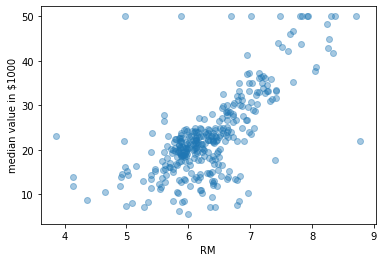

In [28]:
# plotting the training data
plt.scatter(X_train[:,1], y_train, alpha=0.4)
plt.xlabel(colname)
plt.ylabel('median value in $1000')

plt.show()

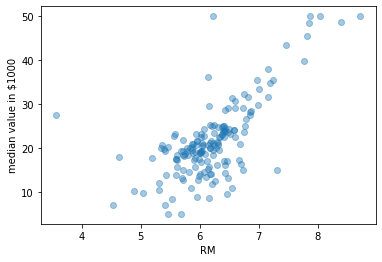

In [29]:
# plotting the testing data
plt.scatter(X_test[:,1], y_test, alpha=0.4)
plt.xlabel(colname)
plt.ylabel('median value in $1000')

plt.show()

### <mark>3. Training (Finding $\mathbf{w}$)</mark>

Solve the problem for the training data. Use the weight computation function.
Print the resulting weight vector and plot the linear function on top of the data points.
You should get a plot like the one below:

<img src="https://www.ime.usp.br/~nina/foo.png" alt="drawing" width="300"/>


Estimated w =
 [[-34.22235235]
 [  9.03907314]]


Text(0, 0.5, 'median value in $1000')

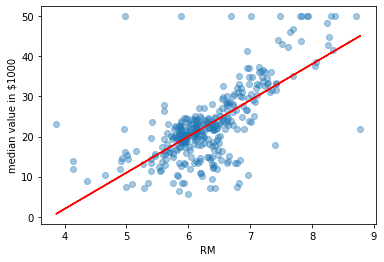

In [36]:
# Solve the problem using the training data
# Print the weight vector
# Plot the linear function on top of the data points

# START OF YOUR CODE
w = 0  # this is temporary

# Computing the weights
w = compute_weights(X_train, y_train)
print("Estimated w =\n", w)

# Computing the predicted linear function
prediction = make_prediction(X_train, w)

# Plotting the linear function on top of the data points
plt.scatter(X_train[:,1], y_train, alpha=0.4) # data points
plt.plot(X_train[:,1], prediction, color='red') # linear function
plt.xlabel(colname)
plt.ylabel('median value in $1000')

# END OF YOUR CODE

## Fitting metrics

Besides the MSE loss, we can use the [$R^2$](https://pt.wikipedia.org/wiki/R%C2%B2) metric (Coefficient of determination) to evaluate how well the linear model fits the data.

Use [r2_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) of the [scikit-learn](https://scikit-learn.org/) library to compute the coefficient of determination (R2).

### <mark>4. Write the MSE computation function</mark>

In [37]:
def compute_mse(y, yhat):
    """
    Computes the mean squared error (MSE) loss.

    :param y: vector with target output values
    :type y: np.ndarray(shape=(N,1))
    :param yhat: vector with predicted output values 
    :type yhat: np.ndarray(shape=(N, 1))
    :return: mse
    :rtype: float
    """
    
    # START OF YOUR CODE
    
    # raise NotImplementedError("Function normal_equation_prediction() is not implemented")
    
    N = len(y)
    
    mse = np.sum((y - yhat)**2) / N
    
    return mse
    
    # END OF YOUR CODE

### <mark>5. Compute MSE and R2 on the training data</mark>

Print MSE and R2 computed on the training data. Use the prediction and MSE loss computation functions you wrote above and the r2_score function.


In [38]:
from sklearn.metrics import r2_score


# START OF YOUR CODE

# Replace the 0s below appropriately
print("MSE = %f"%(compute_mse(y_train, prediction))) 
print("R2 = %f"%(r2_score(y_train, prediction)))

# END OF YOUR CODE

MSE = 45.829022
R2 = 0.480069


### <mark>6. Evaluate the model on the test data</mark>

Print MSE and R2 computed the on test data. Use the prediction and MSE loss computation functions you wrote above and the r2_score function. Also, plot the datapoints of the test set and the linear function on top of them.

Compare these metrics on the training and testing sets.

In [39]:
# START OF YOUR CODE


# Replace the 0s below appropriately
print( "MSE = %f" %(compute_mse(y_test, make_prediction(X_test, w))) )
print( "R2 = %f" %(r2_score(y_test, make_prediction(X_test, w))) )

# END OF YOUR CODE

MSE = 39.091051
R2 = 0.483459


## 7. <mark>Testing cases with $d>1$</mark>

Now, let us consider input data that consists of multiple features.
Your code for computing the weights and making the prediction should work for $d>1$ too.

In [46]:
# Features: CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT

# Choose two or more features and write the code to build matrix X and target vector y
# For instance, try 'RM' and 'LSTAT'

# START OF YOUR CODE

colname = 'RM', 'LSTAT'
X = df.loc[:, colname]
X = X.to_numpy().reshape(-1,2)
X = np.concatenate([np.ones((len(X), 1)), X], axis = 1)  # data matrix, with left column of ONEs

# target feature
y = df.loc[:, 'MEDV']
y = y.to_numpy()
y = y.reshape((-1,1)) # transform into a column vector

# END OF YOUR CODE

print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (506, 3)
y shape:  (506, 1)


In [47]:
# Write the code to perform the linear regression on the new dataset built in the above cell.
# This time there is no need to split the data into training and testing.

# The weight computation and prediction funcstions written above should work without mofdification
# Print the estimated weight vector, the MSE loss and the coefficient of determination R2
    
# START OF YOUR CODE

w = compute_weights(X, y)
prediction = make_prediction(X, w)

# Replace the 0s below appropriately
print("Estimated w =\n", w)
print("MSE = %f" %(compute_mse(y, prediction)))
print("R2 = %f"%(r2_score(y, prediction)))

# END OF YOUR CODE

Estimated w =
 [[-3.14757777]
 [ 5.34824929]
 [-0.62376231]]
MSE = 31.446818
R2 = 0.627494


## Optional extra
You may add new cells below to show other results/things you think are interesting to report.